In [1]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging,doneFracs,ScoresFromBias
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']


In [11]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'AdaBoost',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)

In [15]:
didList

[1025, 1036, 1038, 1043, 1049, 1050, 1067, 1068, 1014, 1022]

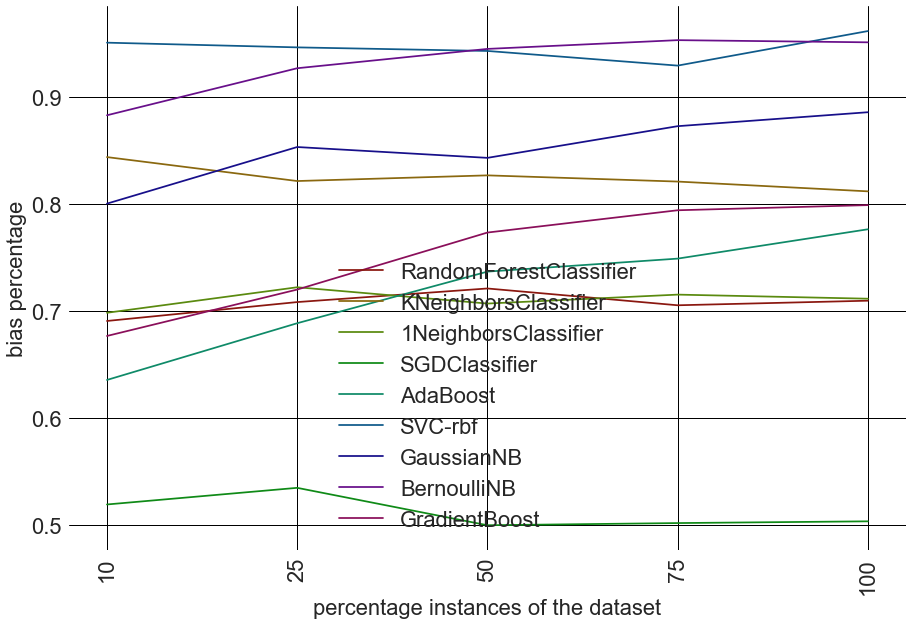

In [14]:
from LocalDatasets import doneFracs
name = 'biasVarErr0'
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'AdaBoost',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])
        
Bias = []
for i in enumerate(clfNames):
    Bias.append([])
for i,item in enumerate(Single):
    for j,itemz in enumerate(Single[i]):
        sumB = 0
        for k,biVaEr in enumerate(Single[i][j]):
            if biVaEr[2] == 0:
                sumB = sumB + biVaEr[0]/1
            else:
                sumB = sumB + biVaEr[0]/biVaEr[2]
            
        
        Bias[i].append(sumB/len(itemz))
amountList.append(0.0)
amountList = [1-i for i in amountList]
cl = sns.hls_palette(len(Bias), l=.3, s=.8)
x_axis = amountList
for i,item in enumerate(amountList):
    amountList[i] = round(item*100)
fig, ax = plt.subplots()
for i in range(0,len(Bias)):
    _= ax.plot(range(len(Bias[i])),Bias[i], color = cl[i],label = clfNames[i])
_=plt.xticks(range(len(Bias[i])),amountList ,rotation='vertical')
# _=plt.title('Bias percentage against instances ',fontdict = {'fontsize': 22})
_=plt.ylabel('bias percentage',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage instances of the dataset',fontdict = {'fontsize': 22})
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
plt.legend( prop={'size': 22})
plt.show()

In [7]:
path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\'
name = 'biasVarErr0'
listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
dictA = []
for i,did in enumerate(listA):
    path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\' + str(did)
    dictA.append([])
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            dictA[i].append({str(did) : dirname})
didList = []
for i,item in enumerate(dictA):
    if len(item) == 4:
        didList.append(int([*item[0]][0]))
# clfNames.remove('SVC-rbf')
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])


In [11]:
len(didList)

6

In [13]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
clfName = 'GradientBoost'
amountList2 = []
for i in amountList:
    amountList2.append(str(i))
doneFracs(func,clfName,amountList2)

[]

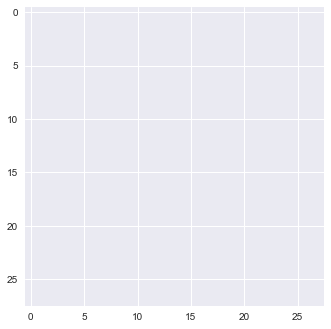

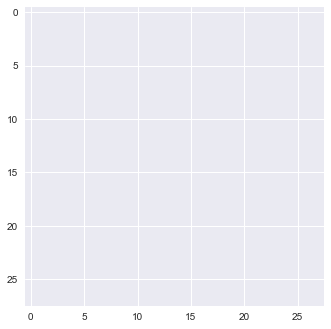

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 1, 28)
y = np.linspace(0, 1, 28).reshape(-1, 1)
ims = []
for i in range(300):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=0)
fig.set_facecolor('xkcd:white')

plt.show()

In [2]:
path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\'
name = 'biasVarErr0'
listA = []
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        if float(dirname) > 2:
            listA.append(int(dirname))
dictA = []
for i,did in enumerate(listA):
    path = 'D:\\stack\\afstudeer\\results\\BiasVarianceSplitedV2\\1NeighborsClassifier\\' + str(did)
    dictA.append([])
    for (dirpath, dirnames, filenames) in os.walk(path):
        for dirname in dirnames:
            dictA[i].append({str(did) : dirname})
            

didList = []
for i,item in enumerate(dictA):
    if len(item) == 4:
        didList.append(int([*item[0]][0]))
# clfNames.remove('SVC-rbf')

In [9]:
from LocalDatasets import doneFracs
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)

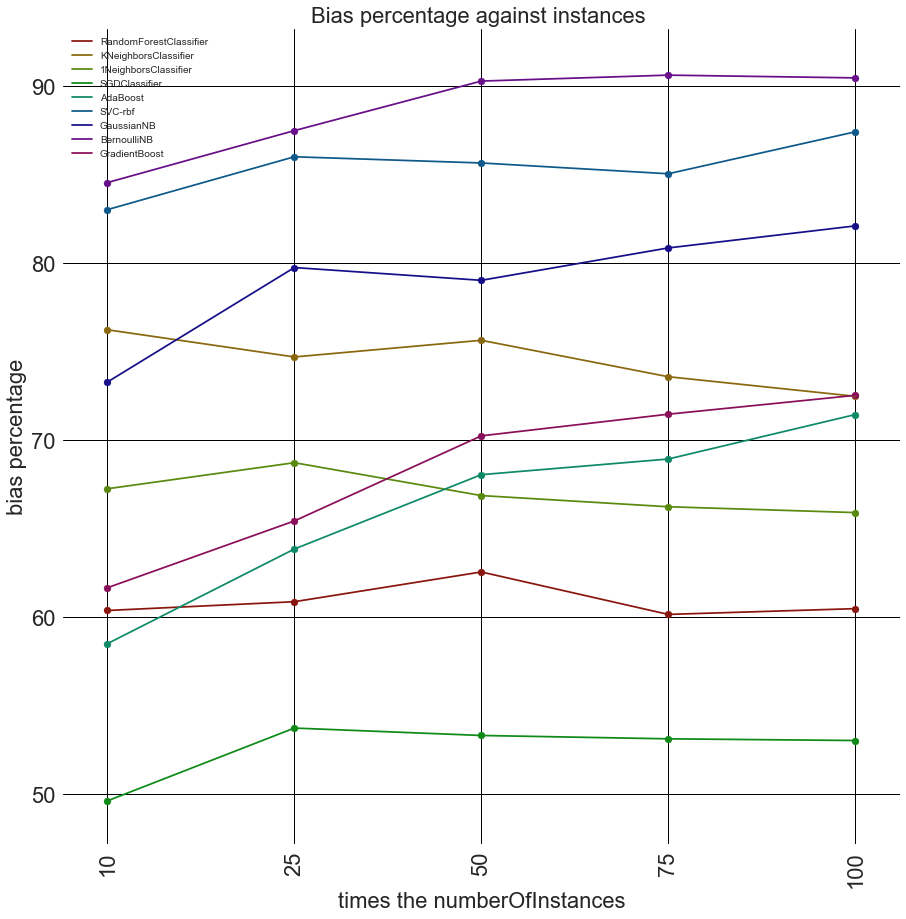

In [3]:
from LocalDatasets import doneFracs
name = 'biasVarErr0'
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)
amountList = [0.9,0.75,0.5,0.25]

Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
    Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])
func = 'BiasVarianceV2'
amount = 40
for i,clfName in enumerate(clfNames):
    for did in didList:
        Single[i][len(amountList)].append(read_did_pred(func,clfName,did,amount,name)[0])
        
Bias = []
for i in enumerate(clfNames):
    Bias.append([])
for i,item in enumerate(Single):
    for j,itemz in enumerate(Single[i]):
        sumB = 0
        for k,biVaEr in enumerate(Single[i][j]):
            if biVaEr[2] == 0:
                sumB = sumB + biVaEr[0]/1
            else:
                sumB = sumB + biVaEr[0]/biVaEr[2]
            
        
        Bias[i].append(sumB/len(itemz))
for i,item in enumerate(Bias):
    for j,itemz in enumerate(Bias[i]):
        Bias[i][j] = Bias[i][j]*100
    
amountList.append(0.0)
amountList = [round(100-i*100) for i in amountList]
cl = sns.hls_palette(len(Bias), l=.3, s=.8)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(Bias)):
    _= ax.plot(range(len(Bias[i])),Bias[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(range(len(Bias[i])),Bias[i], color = cl[i] )
_=plt.xticks(range(len(Bias[i])),amountList ,rotation='vertical')
_=plt.title('Bias percentage against instances ',fontdict = {'fontsize': 22})
_=plt.ylabel('bias percentage',fontdict = {'fontsize': 22})
_=plt.xlabel('times the numberOfInstances',fontdict = {'fontsize': 22})
fig.set_figheight(15)
fig.set_figwidth(15)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
plt.show()

In [17]:
instances = 0
features = 0
for did in didList:
    instances = instances + readDict(did)['NumberOfInstances']/len(didList)
    features = features + readDict(did)['NumberOfFeatures']/len(didList)
print(instances,features)

3560.3571428571427 124.7142857142857


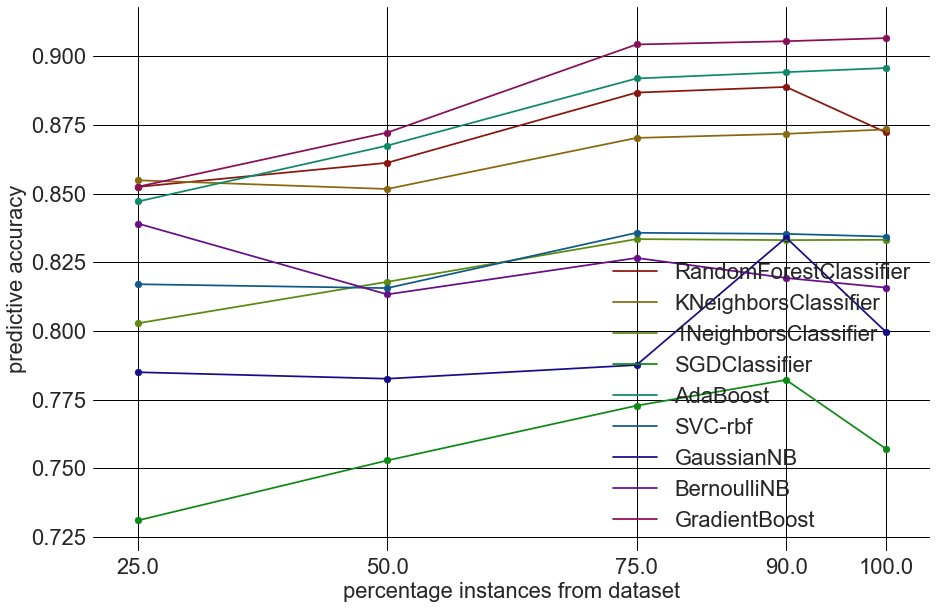

In [20]:
# from LocalDatasets import DoneFeatureMan
# func = 'BiasVarianceSplitedV2'
# # amountList = [0.9,0.75,0.5,0.25]
# amountList = [0.25,0.5,0.75,0.9]
# amountList2 = []
# for amount in amountList:
#     amountList2.append(str(amount))
# didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
# func2 = 'BiasVariance'
# amountList3 = ['40']
# didList3 = doneFracs(func2,'1NeighborsClassifier',amountList3)
# didList = []
# for did in didList2:
#     if did in didList3:
#         didList.append(did)
# amountList.append(1.0)
# amountList.sort()
# scores = []
# scores2 = []

# # amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# # func2 = 'cvScoreFeatures4Fixed'
# for i,did in enumerate(didList):
#     scores.append([])
#     scores2.append([])
#     for clfName in clfNames:
#         score1 = []
#         score2 = []
#         for amount in amountList:
#             if not amount == 1.0:
#                 if not checkForExist(func,clfName,did,amount):
#                     print(func,clfName,amount,did)
#                 score1.append(read_features(func,clfName,did,amount))
#             else:
#                 score1.append(read_features(func2,clfName,did,40))
                

            
#         scores[i].append(score1)
# score1= []
# score2 = []
# score3 = []
# ratio = []
# for i in clfNames:
#     score1.append([0 for i in range(len(amountList))])
#     score2.append([0 for i in range(len(amountList))])
#     score3.append([0 for i in range(len(amountList)+1)])
# MaxClass = []
# for i,amount in enumerate(amountList):
#     if amount == 1.0:
#         middle = i
# for k,x in enumerate(scores):
#     for j in range(0,len(x)):    
#         for i in range(0,len(x[j])):            
#             score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][0])/(len(didList))
# #             score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][1])/len(didList)

# for i,x in enumerate(amountList):
#     amountList[i] = x*100
# for i,amount in enumerate(amountList):
#     if not amount == round(amount):
#         amountList[i] = round(amount)
# amountList2 = copy(amountList)
# x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' accuracy against feature percentage of dataset, features removed by least Importance' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis )
_=plt.ylabel('predictive accuracy',fontdict = {'fontsize': 22})
_=plt.xlabel('percentage instances from dataset',fontdict = {'fontsize': 22})
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()

In [35]:
func = 'BiasVarianceSplitedV2'
# amountList = [0.9,0.75,0.5,0.25]
amountList = [0.25,0.5,0.75,0.9]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func2 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func2,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)
print(didList)

[1025, 1067, 1036, 1068, 1038, 1043, 1014, 1049, 1050, 1022]


In [28]:
scoresYo = [0.901515151515,0.901515151515,0.840909090909,0.863636363636,0.871212121212,0.909090909091,0.863636363636,0.871212121212,0.863636363636,0.901515151515,0.901515151515,0.871212121212,0.878787878788,0.916666666667,0.893939393939,0.871212121212,0.878787878788,0.909090909091,0.856060606061,0.916666666667,0.901515151515,0.863636363636,0.878787878788,0.848484848485,0.833333333333,0.856060606061,0.909090909091,0.916666666667,0.886363636364,0.871212121212,0.856060606061,0.886363636364,0.901515151515,0.795454545455,0.825757575758,0.871212121212,0.901515151515,0.863636363636,0.878787878788,0.916666666667
]
scure2 = [0.901515151515,0.916666666667,0.931818181818,0.901515151515,0.856060606061,0.840909090909,0.886363636364,0.901515151515,0.878787878788,0.878787878788,0.909090909091,0.878787878788,0.931818181818,0.909090909091,0.863636363636,0.924242424242,0.939393939394,0.901515151515,0.909090909091,0.856060606061,0.863636363636,0.909090909091,0.886363636364,0.878787878788,0.909090909091,0.901515151515,0.893939393939,0.810606060606,0.916666666667,0.901515151515,0.901515151515,0.916666666667,0.893939393939,0.878787878788,0.886363636364,0.878787878788,0.909090909091,0.886363636364,0.878787878788,0.916666666667
]
scure3 = [0.878787878788,0.924242424242,0.909090909091,0.871212121212,0.871212121212,0.924242424242,0.893939393939,0.871212121212,0.840909090909,0.856060606061,0.909090909091,0.931818181818,0.916666666667,0.878787878788,0.833333333333,0.916666666667,0.893939393939,0.856060606061,0.901515151515,0.893939393939,0.901515151515,0.886363636364,0.878787878788,0.886363636364,0.818181818182,0.916666666667,0.856060606061,0.878787878788,0.893939393939,0.916666666667,0.848484848485,0.893939393939,0.916666666667,0.856060606061,0.878787878788,0.909090909091,0.878787878788,0.901515151515,0.886363636364,0.871212121212
]
print(sum(scure2)/len(scure2))
print(sum(scure3)/len(scure3))
print(sum(scoresYo)/len(scoresYo))

0.8933712121212499
0.8861742424242749
0.8785984848485


In [30]:
read_features(func,clfName,did,0.9)

[0.96262626262605, 0, 0]

In [33]:
read_features(func2,clfName,did,40)

[0.9939393939393752, 0, 0]

In [32]:
sum([0.983333333333,0.993939393939,0.995454545455,0.984848484848,0.993939393939,0.995454545455,0.998484848485,0.995454545455,0.993939393939,0.993939393939,0.990909090909,0.990909090909,0.995454545455,0.995454545455,0.99696969697,0.99696969697,0.992424242424,0.995454545455,0.99696969697,0.99696969697,0.990909090909,0.99696969697,0.993939393939,0.992424242424,0.987878787879,0.992424242424,0.995454545455,0.987878787879,0.990909090909,0.995454545455,0.995454545455,0.998484848485,0.99696969697,0.995454545455,0.99696969697,0.993939393939,0.995454545455,0.987878787879,0.995454545455,0.993939393939
    ])/len([0.983333333333,0.993939393939,0.995454545455,0.984848484848,0.993939393939,0.995454545455,0.998484848485,0.995454545455,0.993939393939,0.993939393939,0.990909090909,0.990909090909,0.995454545455,0.995454545455,0.99696969697,0.99696969697,0.992424242424,0.995454545455,0.99696969697,0.99696969697,0.990909090909,0.99696969697,0.993939393939,0.992424242424,0.987878787879,0.992424242424,0.995454545455,0.987878787879,0.990909090909,0.995454545455,0.995454545455,0.998484848485,0.99696969697,0.995454545455,0.99696969697,0.993939393939,0.995454545455,0.987878787879,0.995454545455,0.993939393939
           ])

0.993787878787975

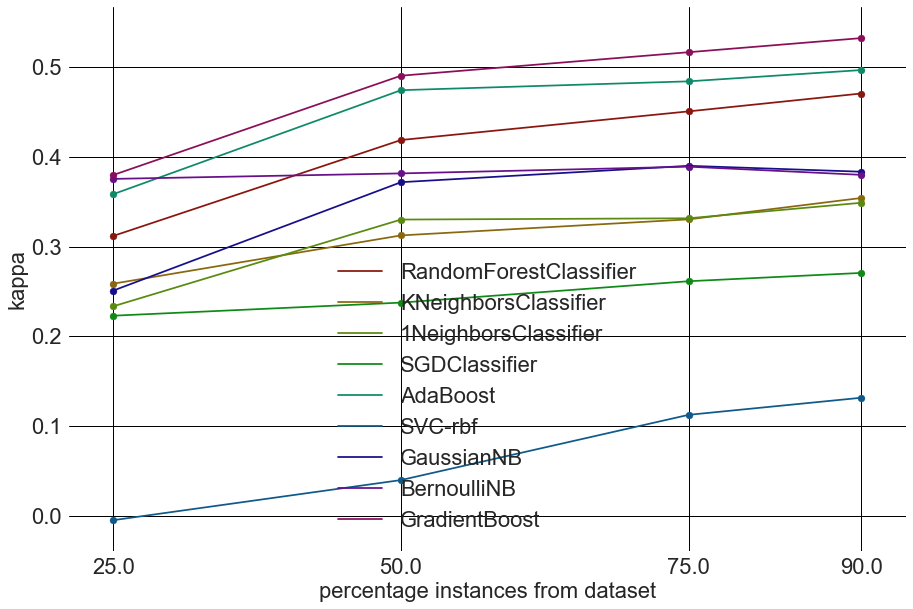

scoreM


In [21]:
from LocalDatasets import DoneFeatureMan
func = 'BiasVarianceSplitedV2'
# amountList = [0.9,0.75,0.5,0.25]
amountList = [0.25,0.5,0.75,0.9]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func2 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func2,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList3:
        didList.append(did)
# amountList.append(1.0)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]
scoreM = 'kappa'
# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,amount):
                    print(func,clfName,amount,did)
                score1.append(ScoresFromBias(func,clfName,did,amount,scoreM))
#             else:
#                 score1.append(ScoresFromBias(func2,clfName,did,40,scoreM))               

            
        scores[i].append(score1)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
middle = 4
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):            
            score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i])/(len(didList))
#             score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = copy(amountList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title( scoreM +  ' against feature percentage of dataset, features removed by least Importance' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis )
_=plt.ylabel(scoreM,fontdict = {'fontsize': 22})
_=plt.xlabel('percentage instances from dataset',fontdict = {'fontsize': 22})
fig.set_figheight(10)
fig.set_figwidth(15)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
ax.legend( prop={'size': 22})
plt.show()
print('scoreM')

In [23]:
print(did,amount)

1025 0.25


In [2]:

import csv
from preamble import *
import os
import ast
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,zero_one_loss,cohen_kappa_score

pathL = 'C:\\Users\\S127788\\Documents\\GitHub\\Assignment2\\'
dropbox = 'D:\\stack\\afstudeer\\results\\'  
path = dropbox + func + '\\' + clfName + '\\' + str(amount) + '\\' + str(did) + '\\' + name + '.csv'
# os.path.isdir(path)
os.path.isfile(path) 

NameError: name 'func' is not defined

In [19]:
scores[k][j][i]

0.62312360268284894

In [12]:
from LocalDatasets import read_did_pred,read_did
name = 'Predictions01'
amount = 151
did = 0.1
file = read_did_pred(func,clfName,amount,did,name)
name = 'order0'
order = read_did_pred(func,clfName,amount,did,name)[0]
X,y = read_did(amount)
preds = []
true_preds = []
for i,item in enumerate(file):
    for j,val in enumerate(file[i]):
        preds.append(val)
        true_preds.append(y[order[i]])

TypeError: 'list' object is not callable

In [13]:
preds = []
true_preds = []
for i,item in enumerate(file):
    for j,val in enumerate(file[i]):
        preds.append(val)
        true_preds.append(y[order[i]])

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,zero_one_loss,cohen_kappa_score
recall_score(preds,true_preds)

0.90573793458088714

In [15]:
scores[5][0]

[0.5101517196198786,
 0.48998362166035414,
 0.47562833197049392,
 0.39878044222483267]

In [16]:
scoreM

'kappa'

In [6]:
listie = [27.90203107788693,27.340027930797078,27.39547772728838,25.619081833632663,25.578342028384213,28.083855776072596,27.32983621377207,27.755027713807067,26.380466143906233,27.006258828943828,24.28079884609906,25.36577297549229,26.93709158891579,27.47441879515827,27.939453613566002,24.45005493024655,26.904347997813602,23.744097498361953,23.257530172617408,25.026048587300465,26.97878932095773,27.591450436244486,27.15373859643296,26.2142028191156,27.005806318848045,25.037287709128577,27.13434356536891,27.24025725782849,27.2989392344316,26.482240685625584,25.732755001386977,25.231946529704146,23.103140361519763,27.572883625427494,26.04727877107507,27.71680962832761,26.710161192095256,26.371421305913827,24.935929837520234,25.543817897851113
]
listie = [704.9426060680271,728.1279723403277,734.4785284449899,709.1564417103218,822.529655258506,794.2793376968766,790.9488151598634,783.3990985394485,811.0644507488032,797.7071925698692,792.7110184256453,800.0268036647467,783.3007587833417,799.1634207519819,797.852797443702,779.098347070365,809.3681245163461,774.2730564374651,740.4776502438326,708.1025461982063,733.9566882502841,708.5355976229475,705.9478426045098,757.5661574140249,702.9866945942049,727.2050302250427,727.5502790885366,725.1896012401121,746.388539645588,735.4884193013131,736.8040950700233,784.4574347944144,834.9483955640317,814.4810743018606,812.4421006513148,780.8961618562316,767.2741357813065,736.9033008367987,731.3712752641295,750.0193123797071
]

In [8]:
sum(listie)/60/60

8.467061321821957

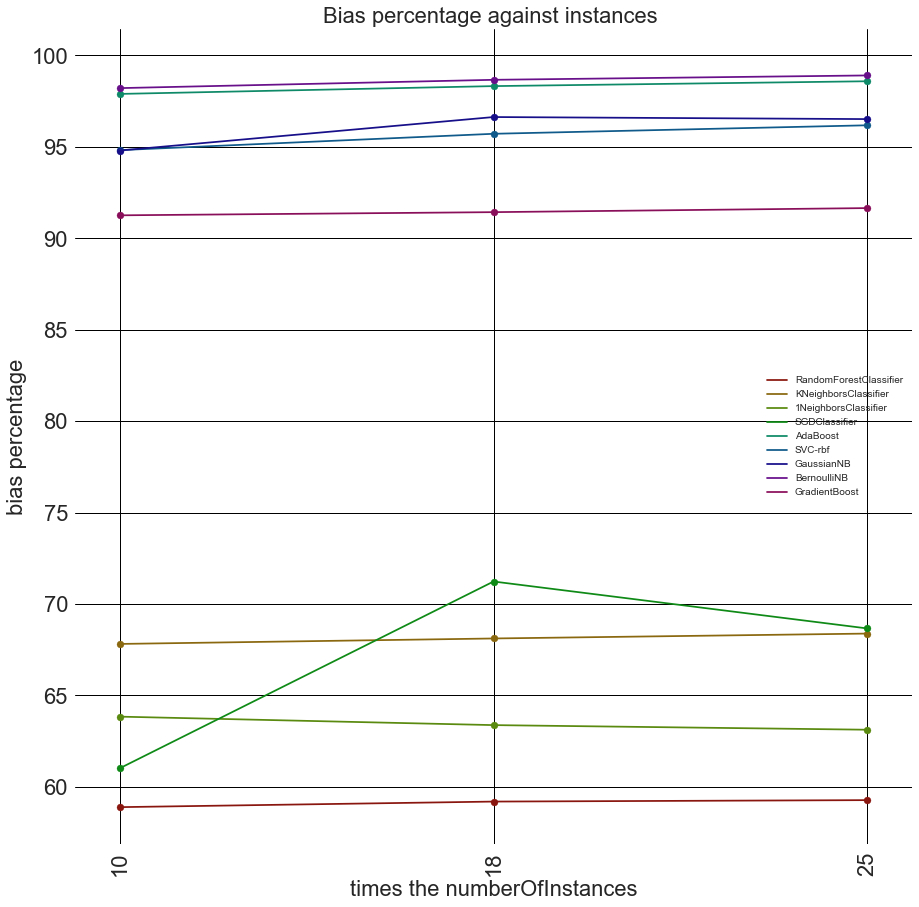

In [13]:
from LocalDatasets import doneFracs
name = 'biasVarErr0'
func = 'BiasVarianceSplitedV2'
amountList = [0.9,0.75,0.5,0.25]
amountList2 = []
for amount in amountList:
    amountList2.append(str(amount))
didList2 = doneFracs(func,'1NeighborsClassifier',amountList2)
func3 = 'BiasVariance'
amountList3 = ['40']
didList3 = doneFracs(func3,'1NeighborsClassifier',amountList3)
didList = []
for did in didList2:
    if did in didList2:
        didList.append(did)
amountList = [0.9,0.825,0.75]
didList = [1370]
Single = []
for i,clfName in enumerate(clfNames):
    Single.append([])
    for k in amountList:
        Single[i].append([])
#     Single[i].append([])
# Single = []
func = 'BiasVarianceSplitedV2'
for did in didList:
    for i,clfName in enumerate(clfNames):
#         Single.append([])
        for k,amount in enumerate(amountList):
            Single[i][k].append(read_did_pred(func,clfName,did,amount,name)[0])

        
Bias = []
for i in enumerate(clfNames):
    Bias.append([])
for i,item in enumerate(Single):
    for j,itemz in enumerate(Single[i]):
        sumB = 0
        for k,biVaEr in enumerate(Single[i][j]):
            if biVaEr[2] == 0:
                sumB = sumB + biVaEr[0]/1
            else:
                sumB = sumB + biVaEr[0]/biVaEr[2]
            
        
        Bias[i].append(sumB/len(itemz))
for i,item in enumerate(Bias):
    for j,itemz in enumerate(Bias[i]):
        Bias[i][j] = Bias[i][j]*100
    
# amountList.append(0.0)
amountList = [round(100-i*100) for i in amountList]
cl = sns.hls_palette(len(Bias), l=.3, s=.8)
x_axis = amountList
fig, ax = plt.subplots()
for i in range(0,len(Bias)):
    _= ax.plot(range(len(Bias[i])),Bias[i], color = cl[i],label = clfNames[i] )
    _= ax.scatter(range(len(Bias[i])),Bias[i], color = cl[i] )
_=plt.xticks(range(len(Bias[i])),amountList ,rotation='vertical')
_=plt.title('Bias percentage against instances ',fontdict = {'fontsize': 22})
_=plt.ylabel('bias percentage',fontdict = {'fontsize': 22})
_=plt.xlabel('times the numberOfInstances',fontdict = {'fontsize': 22})
fig.set_figheight(15)
fig.set_figwidth(15)
# ax.set_yscale("log", nonposy='clip')
# ax.set_xscale("log", nonposy='clip')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=plt.legend()
plt.show()

In [11]:
Single

[[[[3445.4813153493287, 2404.893684650096, 5850.374999999642]],
  [[5591.152670553965, 3853.672329445998, 9444.824999997052]],
  [[7467.6599072947065, 5130.265092705437, 12597.924999994058]],
  []],
 [[[3926.5067126489835, 1863.4932873504054, 5789.999999999811]],
  [[6405.468084527488, 2998.5319154723225, 9403.999999998023]],
  [[8736.556699540744, 4039.518300459674, 12776.074999995952]],
  []],
 [[[4492.546741694172, 2544.5282583052117, 7037.0749999993905]],
  [[7318.50227155424, 4228.84772844589, 11547.349999996595]],
  [[9857.982487883452, 5758.467512116315, 15616.449999993745]],
  []],
 [[[7723.611260430788, 4934.788739568922, 12658.399999997884]],
  [[14760.337442095239, 5962.187557903849, 20722.52499999946]],
  [[20545.11509380737, 9377.084906193408, 29922.200000006433]],
  []],
 [[[10717.642722391278, 231.8322776087461, 10949.474999999913]],
  [[18957.579492507866, 325.84550749196046, 19283.424999999872]],
  [[27060.857216104352, 390.96778389563485, 27451.8250000005]],
  []],
 [